# Cleaning and Analyzing the Bios

### Importing Libraries

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Activants46\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Activants46\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### Loading the Data

In [5]:
with open("./Pickles/mechanic_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)


## Cleaning the Text

In [6]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [7]:
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [14]:
df['Bios'] = df.Bios.apply(tokenize)

### Most Frequent Words

In [15]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  104


In [16]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 2054),
 ('web', 1672),
 ('alcohol', 1632),
 ('twitter', 1615),
 ('travel', 1611),
 ('social', 1590),
 ('beer', 1590),
 ('internet', 1570),
 ('food', 1569),
 ('zombie', 1527),
 ('medium', 1523),
 ('tv', 1445),
 ('music', 1408),
 ('pop', 1398),
 ('culture', 1384),
 ('fan', 1356),
 ('aficionado', 1343),
 ('coffee', 1327),
 ('bacon', 1284),
 ('ninja', 1196),
 ('geek', 1192),
 ('expert', 1173),
 ('trailblazer', 1134),
 ('nerd', 1124),
 ('lover', 1090),
 ('maven', 1034),
 ('specialist', 1027),
 ('advocate', 1006),
 ('enthusiast', 965),
 ('thinker', 962),
 ('buff', 957),
 ('junkie', 928),
 ('scholar', 910),
 ('practitioner', 905),
 ('guru', 891),
 ('passionate', 886),
 ('evangelist', 872),
 ('writer', 818),
 ('gamer', 798),
 ('devoted', 790),
 ('avid', 788),
 ('lifelong', 762),
 ('hardcore', 761),
 ('explorer', 754),
 ('extreme', 735),
 ('wannabe', 733),
 ('entrepreneur', 732),
 ('organizer', 725),
 ('professional', 723),
 ('total', 718),
 ('creator', 710),
 ('problem', 706),
 ('

### Plotting the Most Frequent Words

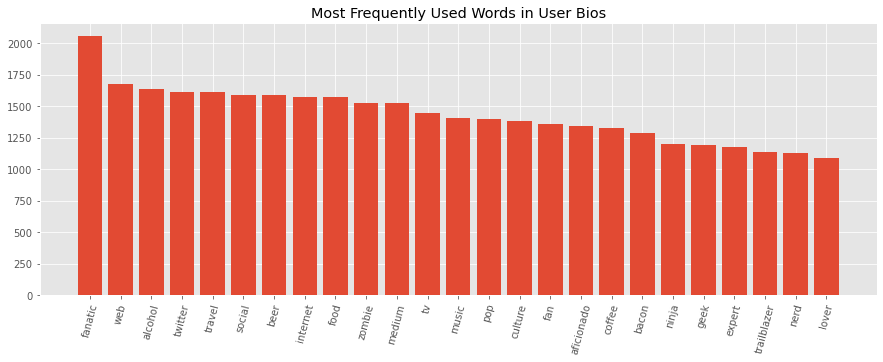

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

It would possibly be best to create some bigrams with this data as most of the words appear to be adjectives.

## Bigrams

In [18]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

In [19]:
# Top 50 most common bigrams
bio_scored[:50]

[(('social', 'medium'), 0.01987005531781651),
 (('pop', 'culture'), 0.018056570295376266),
 (('problem', 'solver'), 0.009210938315415928),
 (('subtly', 'charming'), 0.007827992902619768),
 (('infuriatingly', 'humble'), 0.007162613505897088),
 (('fit', 'apathy'), 0.003679156664231291),
 (('prone', 'fit'), 0.003679156664231291),
 (('twitter', 'fan'), 0.003013777267508611),
 (('web', 'fanatic'), 0.002974637302995512),
 (('future', 'teen'), 0.0027267508610792192),
 (('teen', 'idol'), 0.0027267508610792192),
 (('zombie', 'fanatic'), 0.0024919110740006262),
 (('food', 'fanatic'), 0.002465817764325227),
 (('animal', 'everywhere'), 0.0024266777998121283),
 (('friend', 'animal'), 0.0024266777998121283),
 (('boxing', 'glove'), 0.0023744911804613297),
 (('type', 'boxing'), 0.0023744911804613297),
 (('unable', 'type'), 0.0023744911804613297),
 (('music', 'fanatic'), 0.00236144452562363),
 (('beer', 'fanatic'), 0.002335351215948231),
 (('tv', 'fanatic'), 0.002322304561110531),
 (('twitter', 'fanati

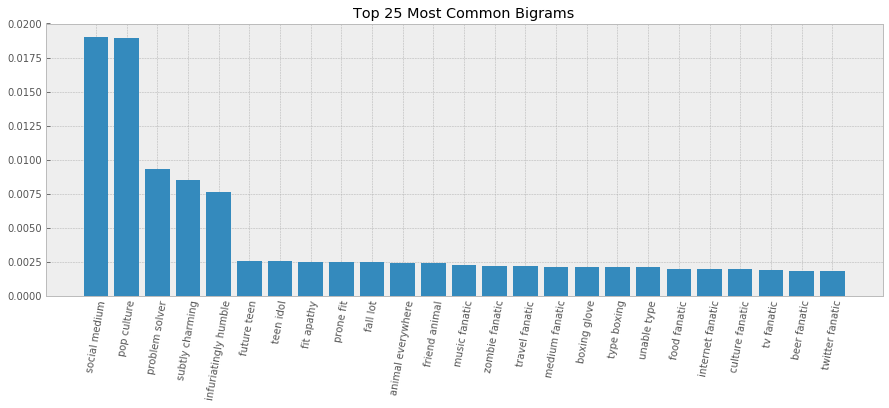

In [55]:
# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [20]:
# Filtering out bigrams based on frequency of occurence
bio_finder.apply_freq_filter(20)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bio_finder.score_ngrams(bigram_meas.pmi)

In [21]:
bio_pmi

[(('fall', 'lot'), 9.331142763928218),
 (('boxing', 'glove'), 8.718165887037465),
 (('type', 'boxing'), 8.718165887037465),
 (('unable', 'type'), 8.718165887037465),
 (('animal', 'everywhere'), 8.686801716128132),
 (('friend', 'animal'), 8.686801716128132),
 (('future', 'teen'), 8.518601395155278),
 (('teen', 'idol'), 8.518601395155278),
 (('fit', 'apathy'), 8.086409174837367),
 (('prone', 'fit'), 8.086409174837367),
 (('infuriatingly', 'humble'), 7.125298188230964),
 (('subtly', 'charming'), 6.997141836740283),
 (('problem', 'solver'), 6.76243615396498),
 (('pop', 'culture'), 5.776811881860727),
 (('social', 'mediaholic'), 5.5911494770644445),
 (('social', 'medium'), 5.5911494770644445),
 (('total', 'internetaholic'), 5.416192398525748),
 (('beeraholic', 'incurable'), 5.2356110609462),
 (('webaholic', 'passionate'), 5.2124052173446955),
 (('unapologetic', 'tvaholic'), 4.833566432651207),
 (('lover', 'fall'), 4.562958439151295),
 (('entrepreneur', 'friend'), 4.493029972731453),
 (('glo

### Creating Bigrams in the DF

In [22]:
# Creating bigrams for each pair of words in the bios
df['Bigrams'] = df.Bios.apply(lambda bio: BigramCollocationFinder.from_words(bio).nbest(bigram_meas.pmi, 100))

In [23]:
df[['Bios', 'Bigrams']]

,Bios,Bigrams
0,"[passionate, analyst, explorer, hipster-friendly, problem, solver, freelance, music, geek, social, medium, advocate, reader]","[(advocate, reader), (analyst, explorer), (explorer, hipster-friendly), (freelance, music), (geek, social), (hipster-friendly, problem), (medium, advocate), (music, geek), (passionate, analyst), (problem, solver), (social, medium), (solver, freelance)]"
1,"[twitter, fanatic, devoted, web, fanatic, zombie, evangelist, travel, aficionado, bacon, lover]","[(aficionado, bacon), (bacon, lover), (devoted, web), (evangelist, travel), (travel, aficionado), (zombie, evangelist), (fanatic, devoted), (fanatic, zombie), (twitter, fanatic), (web, fanatic)]"
2,"[total, alcohol, practitioner, social, medium, buff, evil, beer, expert, devoted, analyst, problem, solver, student]","[(alcohol, practitioner), (analyst, problem), (beer, expert), (buff, evil), (devoted, analyst), (evil, beer), (expert, devoted), (medium, buff), (practitioner, social), (problem, solver), (social, medium), (solver, student), (total, alcohol)]"
3,"[extreme, twitter, advocate, hardcore, internet, junkie, entrepreneur, friend, animal, everywhere]","[(advocate, hardcore), (animal, everywhere), (entrepreneur, friend), (extreme, twitter), (friend, animal), (hardcore, internet), (internet, junkie), (junkie, entrepreneur), (twitter, advocate)]"
4,"[problem, solver, devoted, introvert, food, geek, avid, writer, thinker, troublemaker, friend, animal, everywhere]","[(animal, everywhere), (avid, writer), (devoted, introvert), (food, geek), (friend, animal), (geek, avid), (introvert, food), (problem, solver), (solver, devoted), (thinker, troublemaker), (troublemaker, friend), (writer, thinker)]"
...,...,...
6160,"[lifelong, zombie, junkie, friendly, travel, buff, coffeeaholic, internet, enthusiast]","[(buff, coffeeaholic), (coffeeaholic, internet), (friendly, travel), (internet, enthusiast), (junkie, friendly), (lifelong, zombie), (travel, buff), (zombie, junkie)]"
6161,"[total, introvert, tv, specialist, pop, culture, ninja, web, lover, subtly, charming, twitter, advocate, explorer]","[(advocate, explorer), (charming, twitter), (culture, ninja), (introvert, tv), (lover, subtly), (ninja, web), (pop, culture), (specialist, pop), (subtly, charming), (total, introvert), (tv, specialist), (twitter, advocate), (web, lover)]"
6162,"[friendly, zombie, specialist, avid, bacon, expert, tv, junkie, alcohol, guru, food, aficionado]","[(alcohol, guru), (avid, bacon), (bacon, expert), (expert, tv), (food, aficionado), (friendly, zombie), (guru, food), (junkie, alcohol), (specialist, avid), (tv, junkie), (zombie, specialist)]"
6163,"[wannabe, coffee, practitioner, troublemaker, communicator, friendly, travel, advocate, reader, thinker]","[(advocate, reader), (coffee, practitioner), (communicator, friendly), (friendly, travel), (practitioner, troublemaker), (reader, thinker), (travel, advocate), (troublemaker, communicator), (wannabe, coffee)]"


## Exporting the Data

In [24]:
# Pickling the tokenized words and bigrams
with open("clean_bigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)